<a href="https://colab.research.google.com/github/swethak00/SwethaKanakamedala_INFO5731_Spring2021/blob/main/INFO5731_Assignment_Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis, and regression analysis.

# **Question 1: Topic Modeling**

# **Reading Data**

In [ ]:
import pandas as pd
data = pd.read_csv("/content/joker_reviews.csv")
data = data.head(10000)

# **Data Cleaning**

In [ ]:
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
tokenizer = RegexpTokenizer(r'\w+')
en_stop = get_stop_words('en')
p_stemmer = PorterStemmer()

In [ ]:
data['Lower Case'] = data['text'].apply(lambda x: " ".join(x.lower() for x in str(x).split()))
data['Tokenization'] = data['Lower Case'].apply(lambda x: tokenizer.tokenize(x))
data['Tokens'] = data['Tokenization'].apply(lambda x: [i for i in x if not i in en_stop])
data['Stemming'] = data['Tokens'].apply(lambda x: [p_stemmer.stem(i) for i in x])

In [ ]:
texts = []
for line in data['Stemming']:
  texts.append(line)

# **Bigrams and Trigrams**

In [ ]:
from gensim import corpora, models
bigram = models.Phrases(texts, min_count=5, threshold=100)
trigram = models.Phrases(bigram[texts], threshold=100)
bigram_mod = models.phrases.Phraser(bigram)
trigram_mod = models.phrases.Phraser(trigram)
print(trigram_mod[bigram_mod[texts[0]]])

/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


['someon', 'work', 'mani', 'museum', 'eager', 'visit', 'galleri', 'recent', 'trip', 'la_vega', 'saw', 'show', 'infam', 'egg', 'hous', 'faberg', 'virginia', 'museum', 'fine', 'art', 'vmfa', 'knew', 'go', 'tuck_away', 'near', 'gelateria', 'garden', 'galleri', 'pretti', 'much', 'hidden', 'view', 's', 'real_estat_agent', 'call', 'cozi', 'charm', 'basic', 'euphem', 'small', 'said', 'can', 'still', 'see', 'wonder', 'art_galleri', 'size', 'two', 's', 'ask', 'let', 'tell', 'price', 'rel', 'inexpens', 'la_vega', 'attract', 'complet', 'top', 'space', 'amount', 'art', 'can', 'fit', 'bit', 'much', 's', 'kid', 'friendli', 'serious', 'don', 't', 'bring', 'secur', 'train', 'properli', 'show', 'curat', 'design', 'team', 'collabor', 'exhibit', 'definit', 'flow', 'mean', 'visitor', 'view', 'art', 'certain', 'sequenc', 'whether', 'histor', 'period', 'cultur', 'signific', 'audio', 'guid', 'usual', 'develop', 'arriv', 'galleri', 'tell', 'start', 'secur', 'certainli', 'help', 'told', 'just', 'look', 'around

In [ ]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

In [ ]:
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [ ]:
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [ ]:
import spacy
data_words_bigrams = make_bigrams(texts)
nlp = spacy.load('en', disable=['parser', 'ner'])
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
print(data_lemmatized[:1])

[['someon', 'eager', 'visit', 'recent', 'trip', 'see', 'show', 'infam', 'egg', 'hous', 'fine', 'art', 'vmfa', 'know', 'go', 'gelateria', 'garden', 'galleri', 'pretti', 'much', 'hidden', 'view', 'agent', 'call', 'cozi', 'charm', 'basic', 'small', 'say', 'can', 'still', 'see', 'wonder', 'size', 's', 'ask', 'let', 'tell', 'price', 'complet', 'top', 'space', 'amount', 'art', 'can', 'fit', 'bit', 'much', 'kid', 'serious', 'bring', 'train', 'design', 'team', 'collabor', 'exhibit', 'definit', 'flow', 'visitor', 'view', 'art', 'certain', 'sequenc', 'histor', 'period', 'audio', 'usual', 'develop', 'help', 'tell', 'just', 'look', 'fine', 'institut', 'find', 'lack', 'respect']]


# **Preparing Corpus and Dictionary**

In [ ]:
id2word = corpora.Dictionary(data_lemmatized)
texts = data_lemmatized
corpus = [id2word.doc2bow(text) for text in texts]
print(corpus[:1])

[[(0, 1), (1, 1), (2, 3), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 2), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 2), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 2), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 2), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 2), (60, 1), (61, 1), (62, 1), (63, 1), (64, 2), (65, 1), (66, 1), (67, 1), (68, 1)]]


In [ ]:
id2word[0]

'agent'

In [ ]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('agent', 1),
  ('amount', 1),
  ('art', 3),
  ('ask', 1),
  ('audio', 1),
  ('basic', 1),
  ('bit', 1),
  ('bring', 1),
  ('call', 1),
  ('can', 2),
  ('certain', 1),
  ('charm', 1),
  ('collabor', 1),
  ('complet', 1),
  ('cozi', 1),
  ('definit', 1),
  ('design', 1),
  ('develop', 1),
  ('eager', 1),
  ('egg', 1),
  ('exhibit', 1),
  ('find', 1),
  ('fine', 2),
  ('fit', 1),
  ('flow', 1),
  ('galleri', 1),
  ('garden', 1),
  ('gelateria', 1),
  ('go', 1),
  ('help', 1),
  ('hidden', 1),
  ('histor', 1),
  ('hous', 1),
  ('infam', 1),
  ('institut', 1),
  ('just', 1),
  ('kid', 1),
  ('know', 1),
  ('lack', 1),
  ('let', 1),
  ('look', 1),
  ('much', 2),
  ('period', 1),
  ('pretti', 1),
  ('price', 1),
  ('recent', 1),
  ('respect', 1),
  ('s', 1),
  ('say', 1),
  ('see', 2),
  ('sequenc', 1),
  ('serious', 1),
  ('show', 1),
  ('size', 1),
  ('small', 1),
  ('someon', 1),
  ('space', 1),
  ('still', 1),
  ('team', 1),
  ('tell', 2),
  ('top', 1),
  ('train', 1),
  ('trip', 1),
 

# **LDA**

In [ ]:
lda_model = models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics = 20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [ ]:
from pprint import pprint
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.136*"room" + 0.091*"stay" + 0.059*"insid" + 0.055*"hotel" + 0.042*"wasn" '
  '+ 0.030*"weekend" + 0.027*"crowd" + 0.020*"cake" + 0.020*"casino" + '
  '0.018*"bathroom"'),
 (1,
  '0.040*"go" + 0.039*"good" + 0.035*"place" + 0.031*"time" + 0.030*"get" + '
  '0.027*"come" + 0.025*"great" + 0.024*"will" + 0.023*"just" + 0.022*"make"'),
 (2,
  '0.111*"store" + 0.083*"dog" + 0.058*"understand" + 0.042*"mention" + '
  '0.028*"honestli" + 0.025*"tire" + 0.024*"mani" + 0.022*"smell" + '
  '0.018*"afternoon" + 0.017*"cloth"'),
 (3,
  '0.137*"special" + 0.062*"play" + 0.033*"pricey" + 0.028*"event" + '
  '0.026*"doctor" + 0.023*"fee" + 0.022*"straight" + 0.018*"bone" + '
  '0.017*"child" + 0.016*"detail"'),
 (4,
  '0.035*"hold" + 0.034*"pool" + 0.032*"offic" + 0.028*"origin" + '
  '0.025*"follow" + 0.020*"young" + 0.019*"corner" + 0.018*"wear" + '
  '0.017*"cashier" + 0.017*"forev"'),
 (5,
  '0.023*"hear" + 0.022*"deal" + 0.016*"impress" + 0.015*"soon" + '
  '0.015*"burger" + 0.015*"loc

In [ ]:
from gensim.models import CoherenceModel
print('\nPerplexity: ', lda_model.log_perplexity(corpus))
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.172431360137933

Coherence Score:  0.35519954075493354


# **Visualization using pyLDAvis**

In [ ]:
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
%matplotlib inline
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.346830  0.182705       1        1  41.028896
15    -0.170132 -0.336785       2        1   8.524674
16    -0.215377  0.203275       3        1   7.918693
18    -0.130690 -0.179182       4        1   6.839843
5     -0.025482 -0.041348       5        1   4.901169
17    -0.023085 -0.048265       6        1   3.728424
8     -0.015048 -0.033821       7        1   3.642446
10     0.009660 -0.015010       8        1   3.102657
6      0.014071 -0.018494       9        1   2.902019
0      0.031071  0.028223      10        1   1.989538
9      0.069726  0.020245      11        1   1.894358
7      0.063920  0.019666      12        1   1.884697
11     0.067399  0.017541      13        1   1.833978
13     0.087801  0.024285      14        1   1.633038
14     0.083880  0.024223      15        1   1.600420
4      0.091776  0.028859      16        1   1.521967
19     0.101870  0.030464      17        1   1.334858
2      0.097957  0.030218      18        1   1.300984
3      0.103995  0.031877      19        1   1.268722
12     0.103518  0.031326      20        1   1.148617, topic_info=          Term         Freq        Total Category  logprob  loglift
142       food  8080.000000  8080.000000  Default  30.0000  30.0000
267      order  6159.000000  6159.000000  Default  29.0000  29.0000
114       take  4643.000000  4643.000000  Default  28.0000  28.0000
44       price  2984.000000  2984.000000  Default  27.0000  27.0000
48         say  4087.000000  4087.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
1218  advantag    45.215873    46.144172  Topic20  -5.0722   4.4463
2420    extend    44.306227    45.234526  Topic20  -5.0925   4.4459
2880    picnic    42.597294    43.525593  Topic20  -5.1318   4.4451
2325      soul    42.461026    43.389325  Topic20  -5.1350   4.4450
595       draw    42.190172    43.118471  Topic20  -5.1414   4.4448

[648 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
998      12  0.997166        abl
925      11  0.995676    absolut
1860     18  0.992780     accept
569      12  0.985656     access
1022      7  0.991350    account
...     ...       ...        ...
404       9  0.998084      write
121       4  0.998379      wrong
122       4  0.999187       year
845      18  0.996347  yesterday
1638     16  0.994687      young

[635 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 16, 17, 19, 6, 18, 9, 11, 7, 1, 10, 8, 12, 14, 15, 5, 20, 3, 4, 13])

# **LSA**

In [ ]:
lsamodel = models.LsiModel(corpus, num_topics = 20, id2word = id2word)

In [ ]:
pprint(lsamodel.print_topics(num_topics = 20))

[(0,
  '0.284*"go" + 0.255*"good" + 0.238*"get" + 0.225*"time" + 0.217*"place" + '
  '0.206*"come" + 0.204*"food" + 0.195*"order" + 0.190*"just" + 0.165*"will"'),
 (1,
  '0.485*"good" + 0.406*"food" + 0.227*"place" + -0.223*"go" + -0.196*"say" + '
  '-0.185*"tell" + -0.182*"call" + 0.164*"order" + -0.162*"time" + '
  '0.149*"great"'),
 (2,
  '0.633*"order" + -0.380*"good" + 0.285*"come" + 0.235*"food" + '
  '-0.214*"place" + -0.167*"go" + -0.141*"great" + -0.121*"can" + 0.117*"wait" '
  '+ 0.114*"tabl"'),
 (3,
  '-0.554*"go" + 0.492*"good" + -0.439*"place" + -0.274*"food" + 0.238*"get" + '
  '-0.159*"great" + 0.132*"come" + 0.110*"time" + 0.067*"room" + '
  '-0.066*"back"'),
 (4,
  '-0.623*"go" + 0.416*"place" + -0.416*"good" + 0.293*"great" + 0.169*"come" '
  '+ 0.168*"get" + -0.151*"order" + 0.122*"room" + 0.078*"can" + 0.075*"love"'),
 (5,
  '-0.698*"time" + 0.469*"get" + -0.241*"great" + 0.240*"place" + 0.146*"say" '
  '+ -0.145*"food" + 0.126*"just" + -0.123*"will" + 0.121*"order"

In [ ]:
coherence_values = []
model_list = []
for num_topics in range(2, 12, 1):
  model = models.LsiModel(corpus, num_topics = 20, id2word = id2word)
  model_list.append(model)
  coherencemodel = CoherenceModel(model= model, texts = data['Stemming'], dictionary = id2word, coherence='c_v')
  coherence_values.append(coherencemodel.get_coherence())

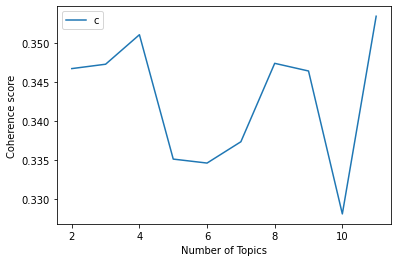

In [ ]:
x = range(2, 12, 1)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

# **Summarization of Topics**

**LDA**

Reviews on Weekends

Good to spend great time

Reviews of movie

Reviews of movie is positive by some people

Reviews of  movie is negative by some people

Reviews of movie is netural by some people

More reviews on the cast and crew

many are neutral having both positive and negative

many praised the hero like he was awesone in acting

many shared their joy by seeing this movie

**LSA**

Reviews on Weekends

Good to spend great time

Reviews of movie

Reviews of movie is positive by some people

Reviews of  movie is negative by some people

Reviews of movie is netural by some people

More reviews on the cast and crew

many are neutral having both positive and negative

many praised the hero like he was awesone in acting

many shared their joy by seeing this movie




# **Question 2: Review Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.

(1) Features used for sentiment classification and explain why you select these features (tf-idf, sentiment lexicon, word2vec, etc). Considering achieve the best performance as you can. 

(2) Select two of the supervised learning algorithm from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build a sentiment classifier respectively. 

(3) Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9. 

# **Classifying Ratings**

In [ ]:
data = data.dropna()
def review_classification(rating):
    if rating == 5:
      return 'Very Positive'
    elif rating == 4:
      return 'Positive'
    elif rating == 3:
      return 'Neutral'
    elif rating == 2:
      return 'Negative'
    elif rating == 1:
      return 'Very Negative'

rating_classification = data['stars'].map(review_classification)
data['Rating'] = rating_classification

Very Positive    4341
Positive         2316
Very Negative    1409
Neutral          1093
Negative          841
Name: Rating, dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


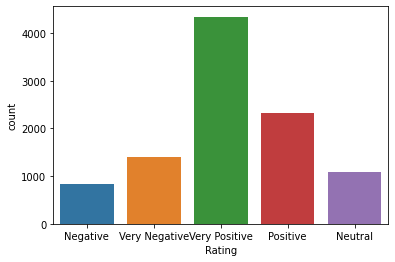

In [ ]:
import seaborn as sns
print(data['Rating'].value_counts())
sns.countplot(data.Rating)

# **Data Cleaning**

In [ ]:
from nltk.corpus import stopwords
from textblob import TextBlob
data['Cleaned Text'] = data['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data['Cleaned Text'] = data['Cleaned Text'].str.replace('[^\w\s]','')
stop = stopwords.words('english')
data['Cleaned Text'] = data['Cleaned Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

# **Feature Selection**

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
Tfidfvector = TfidfVectorizer(ngram_range=(1,2), max_features=1000)
Tfidfvector.fit(data['text'])
x_values = Tfidfvector.transform(data['text'])
encoder = LabelEncoder()
y_values = encoder.fit_transform(data['Rating'])

I have used the Tdidf Vector to improve the performance of the model. It improves the performance model by making it possible to have the words with similar meaning have similar representations and also reduce the computational complexity.

Feature selection improves the accuracy of the model and also reduce the overfitting of the model.



# **Splitting into training and testing data**

In [ ]:
from sklearn import model_selection
X_train, x_test, y_train, y_test = model_selection.train_test_split(x_values, y_values, test_size=0.2)

# **SVM**

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import svm
svm_model = svm.SVC(kernel='linear')
svm_model.fit(X_train, y_train)
predicted = svm_model.predict(x_test)
print("Accuracy score is {0}".format(accuracy_score(y_test, predicted)))
report = classification_report(y_test, predicted, output_dict=True)
report

Accuracy score is 0.611


{'0': {'f1-score': 0.32343234323432346,
  'precision': 0.4083333333333333,
  'recall': 0.2677595628415301,
  'support': 183},
 '1': {'f1-score': 0.3807106598984771,
  'precision': 0.4411764705882353,
  'recall': 0.33482142857142855,
  'support': 224},
 '2': {'f1-score': 0.43995510662177323,
  'precision': 0.4547563805104408,
  'recall': 0.4260869565217391,
  'support': 460},
 '3': {'f1-score': 0.691151919866444,
  'precision': 0.6509433962264151,
  'recall': 0.7366548042704626,
  'support': 281},
 '4': {'f1-score': 0.766685052399338,
  'precision': 0.7232049947970863,
  'recall': 0.8157276995305164,
  'support': 852},
 'accuracy': 0.611,
 'macro avg': {'f1-score': 0.5203870164040711,
  'precision': 0.5356829150911022,
  'recall': 0.5162100903471354,
  'support': 2000},
 'weighted avg': {'f1-score': 0.5971380049009313,
  'precision': 0.5909111071766537,
  'recall': 0.611,
  'support': 2000}}

# **Naive Bayes**

In [ ]:
from sklearn import naive_bayes
nb = naive_bayes.MultinomialNB()
nb.fit(X_train, y_train)
predicted_nb = nb.predict(x_test)
print("Accuracy score is {0}".format(accuracy_score(y_test, predicted_nb)))
report_nb = classification_report(y_test, predicted_nb, output_dict=True)
report_nb

Accuracy score is 0.554


{'0': {'f1-score': 0.062176165803108814,
  'precision': 0.6,
  'recall': 0.03278688524590164,
  'support': 183},
 '1': {'f1-score': 0.03361344537815126,
  'precision': 0.2857142857142857,
  'recall': 0.017857142857142856,
  'support': 224},
 '2': {'f1-score': 0.3372093023255814,
  'precision': 0.3625,
  'recall': 0.31521739130434784,
  'support': 460},
 '3': {'f1-score': 0.6321243523316062,
  'precision': 0.6140939597315436,
  'recall': 0.6512455516014235,
  'support': 281},
 '4': {'f1-score': 0.7230046948356808,
  'precision': 0.6025039123630673,
  'recall': 0.903755868544601,
  'support': 852},
 'accuracy': 0.554,
 'macro avg': {'f1-score': 0.3576255921348257,
  'precision': 0.4929624315617794,
  'recall': 0.3841725679106834,
  'support': 2000},
 'weighted avg': {'f1-score': 0.48382543609081174,
  'precision': 0.5132218680089486,
  'recall': 0.554,
  'support': 2000}}

I have selected the Naive Bayes and SVM. Below are metrics of the two models -
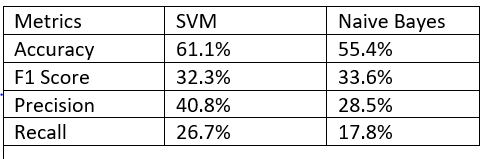


# **Question 3: House price prediction**

(40 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from Dropbox: https://www.dropbox.com/s/52j9hpxppfo921o/assignment4-question3-data.zip?dl=0. Here is an axample for the implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878. 


# **Reading Data from Csv files**

In [ ]:
train_dataset = pd.read_csv("/content/train.csv")
test_dataset = pd.read_csv("/content/test.csv")

# **Getting statistics of the training data**

In [ ]:
train_dataset.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# **Checking for Null values**

In [ ]:
print(train_dataset.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [ ]:
print(test_dataset.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64


# **Exploratory Data Analysis**

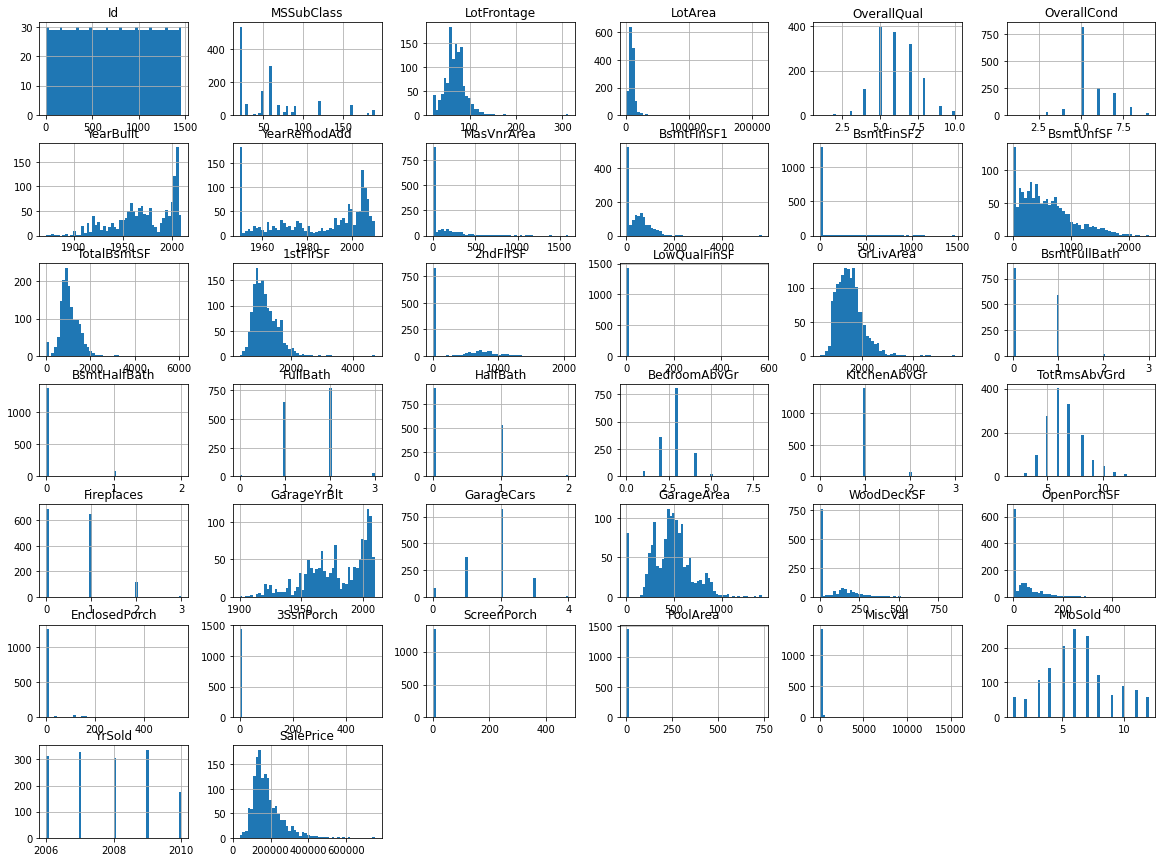

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
train_dataset.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

In [ ]:
corr_matrix = train_dataset.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

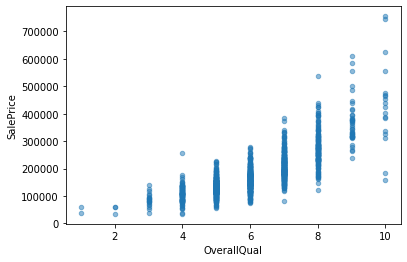

In [ ]:
train_dataset.plot(kind="scatter", x="OverallQual", y="SalePrice", alpha=0.5)

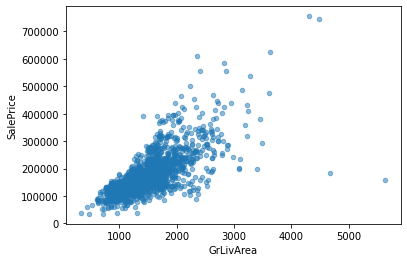

In [ ]:
train_dataset.plot(kind="scatter", x="GrLivArea", y="SalePrice", alpha=0.5)

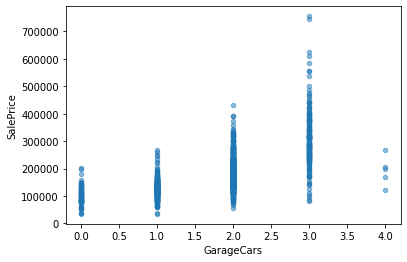

In [ ]:
train_dataset.plot(kind="scatter", x="GarageCars", y="SalePrice", alpha=0.5)

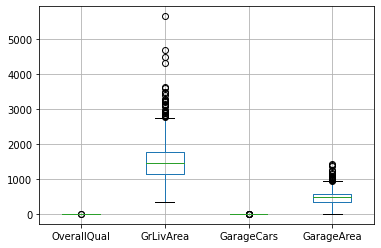

In [ ]:
train_dataset.boxplot(column=['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea'])

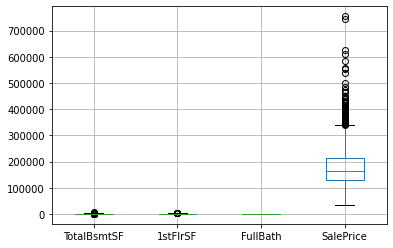

In [ ]:
train_dataset.boxplot(column=['TotalBsmtSF', '1stFlrSF', 'FullBath', 'SalePrice'])

In [ ]:
train_dataset.fillna(train_dataset.mean(), inplace = True)
test_dataset.fillna(test_dataset.mean(), inplace = True)

In [ ]:
print(train_dataset.isnull().sum())

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64


In [ ]:
print(test_dataset.isnull().sum())

Id               0
MSSubClass       0
MSZoning         4
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         1
SaleCondition    0
Length: 80, dtype: int64


# **Data Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder
columns = ('GarageCond', 'LandContour', 'RoofStyle', 'RoofMatl', 'Heating', 'MiscFeature', 'SaleType', 'GarageType', 'Electrical', 'SaleCondition', 'Foundation', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'FireplaceQu', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'Utilities', 'BldgType', 'HouseStyle','PoolQC', 'BsmtQual', 'BsmtCond', 'GarageQual','BsmtExposure', 'ExterQual', 'ExterCond','HeatingQC', 'KitchenQual', 'BsmtFinType1','BsmtFinType2', 'Functional', 'Fence', 'GarageFinish', 'LandSlope','LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 'YrSold', 'MoSold', 'MSZoning')
for column in columns:
    encoder = LabelEncoder()
    encoder.fit(list(train_dataset[column].values))
    train_dataset[column] = encoder.transform(list(train_dataset[column].values))

In [ ]:
for column in columns:
    encoder_test = LabelEncoder()
    encoder_test.fit(list(test_dataset[column].values))
    test_dataset[column] = encoder_test.transform(list(test_dataset[column].values))

In [ ]:
x_values = train_dataset[train_dataset.columns[:80]] 

In [ ]:
x_test_values = test_dataset[test_dataset.columns[:80]]

In [ ]:
y_values = train_dataset['SalePrice']

# **Training the Regression Model**

In [ ]:
from sklearn.linear_model import LinearRegression
reg_model = LinearRegression()
reg_model.fit(x_values, y_values)
reg_model.score(x_values, y_values)

0.8548395143943592

# **Predicting the House Sale Price**

In [ ]:
predicted = reg_model.predict(x_test_values)

In [ ]:
pd.DataFrame({'Predicted House Price Values': predicted})

,Predicted House Price Values
0,184936.609022
1,239791.092108
2,245071.890618
3,263617.412688
4,263185.252850
...,...
1454,152148.218848
1455,138020.527442
1456,225624.228917
1457,196336.422912
